In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Importing data files

mortality_data_df = pd.read_csv("Resources/mortality_2006_2010_clean.csv")

mortality_data_df.head()


,Unnamed: 0,Unnamed: 0.1,Year,ICD-10 113 Cause List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [3]:
mortality_data_df['ICD-10 113 Cause List'] = mortality_data_df['ICD-10 113 Cause List'].str.replace(r"\(.*\)","")
mortality_data_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,ICD-10 113 Cause List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [4]:
mortality_data_df.rename(columns = {"ICD-10 113 Cause List": "Cause_List"},  inplace = True)
mortality_data_df.head()         

,Unnamed: 0,Unnamed: 0.1,Year,Cause_List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [5]:
death_cause_df = mortality_data_df.groupby(['Cause_List']).agg({'Deaths': [np.sum]})
death_cause_df

,Deaths
,sum
Cause_List,
Asthma,772.0
"Bronchitis, chronic and unspecified",53.0
Chronic lower respiratory diseases,46240.0
Emphysema,3180.0
Influenza,246.0
Influenza and pneumonia,24530.0
Other chronic lower respiratory diseases,40385.0
Other diseases of respiratory system,7202.0


In [6]:
# rename columns
death_cause_df.columns = ['Total_mortality']
death_cause_df

,Total_mortality
Cause_List,
Asthma,772.0
"Bronchitis, chronic and unspecified",53.0
Chronic lower respiratory diseases,46240.0
Emphysema,3180.0
Influenza,246.0
Influenza and pneumonia,24530.0
Other chronic lower respiratory diseases,40385.0
Other diseases of respiratory system,7202.0
Pneumonia,24010.0


In [7]:
death1_cause_df = death_cause_df.reset_index()
death1_cause_df



,Cause_List,Total_mortality
0,Asthma,772.0
1,"Bronchitis, chronic and unspecified",53.0
2,Chronic lower respiratory diseases,46240.0
3,Emphysema,3180.0
4,Influenza,246.0
5,Influenza and pneumonia,24530.0
6,Other chronic lower respiratory diseases,40385.0
7,Other diseases of respiratory system,7202.0
8,Pneumonia,24010.0
9,Pneumonitis due to solids and liquids,2026.0


In [8]:
disease_list = death1_cause_df['Cause_List'].tolist()
Total_mortality = death1_cause_df['Total_mortality']
explode = (0,0,0.1,0,0,0,0,0,0,0)
colors = ["yellow","green","red","orange","lightblue","purple","pink","yellowgreen","lightskyblue","lightcoral"]

In [9]:

# death1_cause_df.plot(kind='pie', y=Total_mortality, subplots=False, shadow = False, startangle=45, legend = True,
# figsize=(11,8), autopct='%1.1f%%')

# # Tell matplotlib to create a pie chart based upon the above data
# plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=130)
# # Create axes which are equal so we have a perfect circle
# plt.axis("equal")
# # Save an image of our chart and print the final product to the screen
# plt.savefig("../Images/PyPies.png")
# plt.show()

# Import our dependencies
# import matplotlib.pyplot as plt
# import numpy as np
# death_cause_df.plot(kind='pie', y='Total_mortality', subplots=False, shadow = False, startangle=45, legend = False,
# figsize=(8,8), autopct='%1.1f%%')





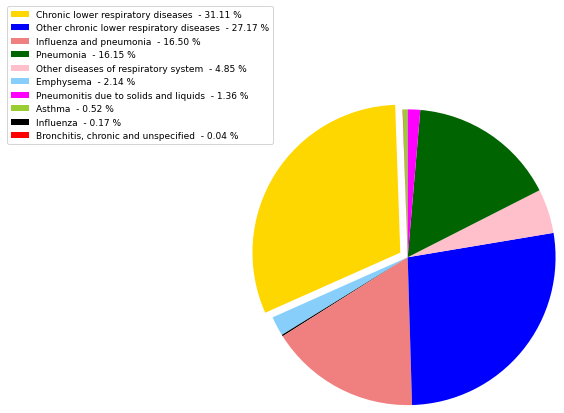

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = disease_list 
y = Total_mortality
explode = (0,0,0.1,0,0,0,0,0,0,0)
colors = ['yellowgreen','red','gold','lightskyblue','black','lightcoral','blue','pink', 'darkgreen','magenta']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.7, explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=9)

plt.savefig('piechart.png', bbox_inches='tight')

#### Here total mortality rate and its causes were analyzed.
#### The percentage rate of diseases are presented from year 2006 - 2010.
##### Chronic lower respiratory diseases have  the highest percentage rate at 31.11 % 
##### Whereas the other chronic lower respiratory diseases have percentage rate  at  27.17% 

